# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn import linear_model, tree, ensemble

# **Reading the Data from CSV file**

In [3]:
dataframe=pd.read_csv("/content/heart.csv")
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# **Data Analysis**

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataframe.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Correlation Matrix**

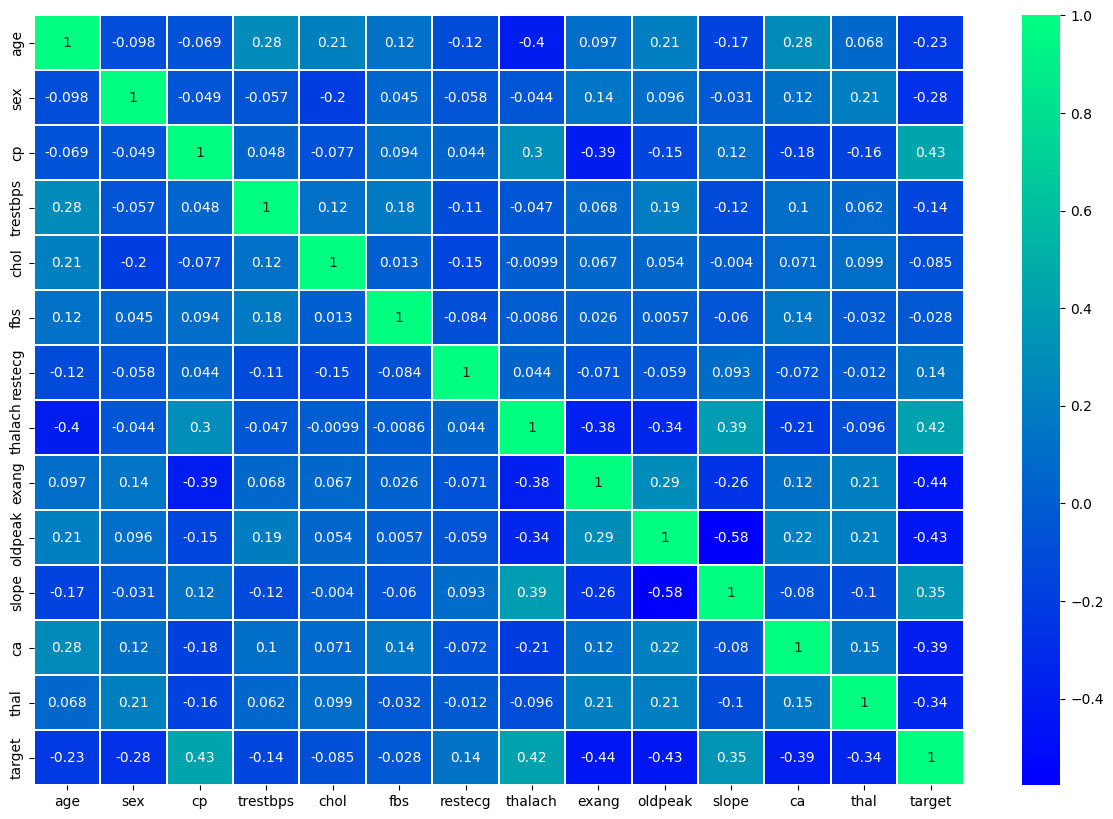

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

# **Train-Test Split**

In [6]:
X = dataframe.drop('target', axis=1)
y = dataframe['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (227, 13) (227,)
Test set size: (76, 13) (76,)


# **Algorithm Implementation**

**1. Logistic Regression**

Logistic Regression:
Accuracy: 0.89
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



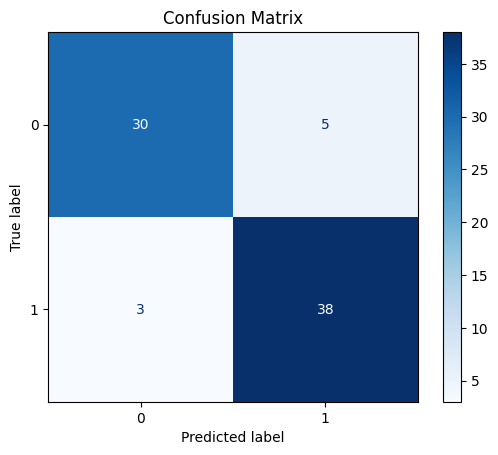

Scatterplot:



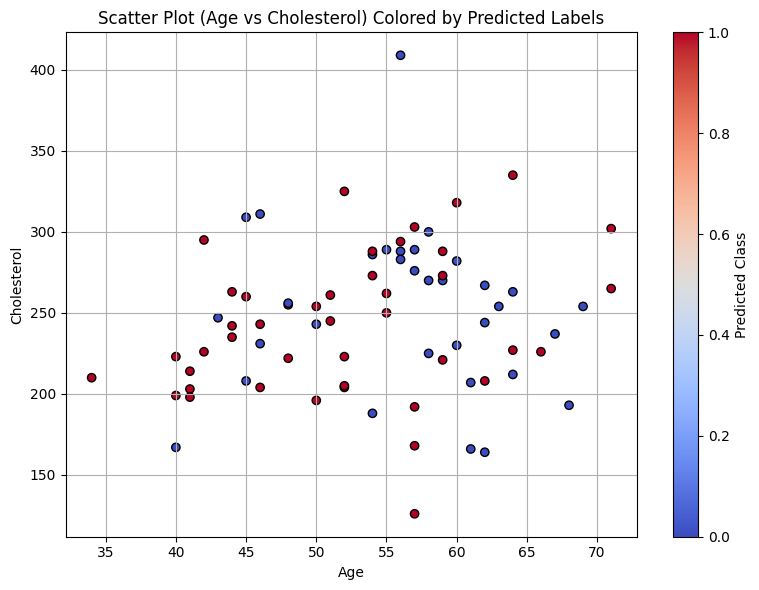

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Logistic Regression:")
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Create a scatter plot of two features colored by predicted labels
print("Scatterplot:\n")
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test['age'], X_test['chol'], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot (Age vs Cholesterol) Colored by Predicted Labels')
plt.colorbar(scatter, label='Predicted Class')
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Decision Tree**

Decision Tree:
Accuracy: 0.83
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.83      0.85      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



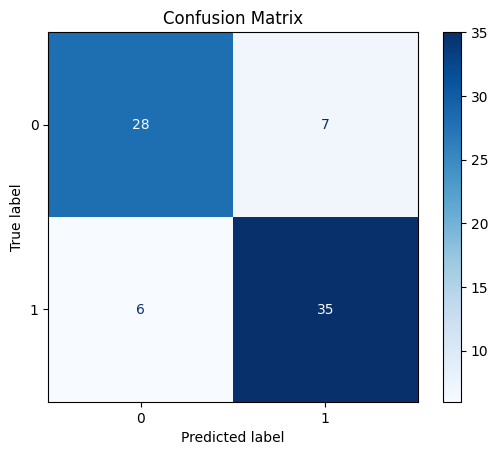

Pairplot:



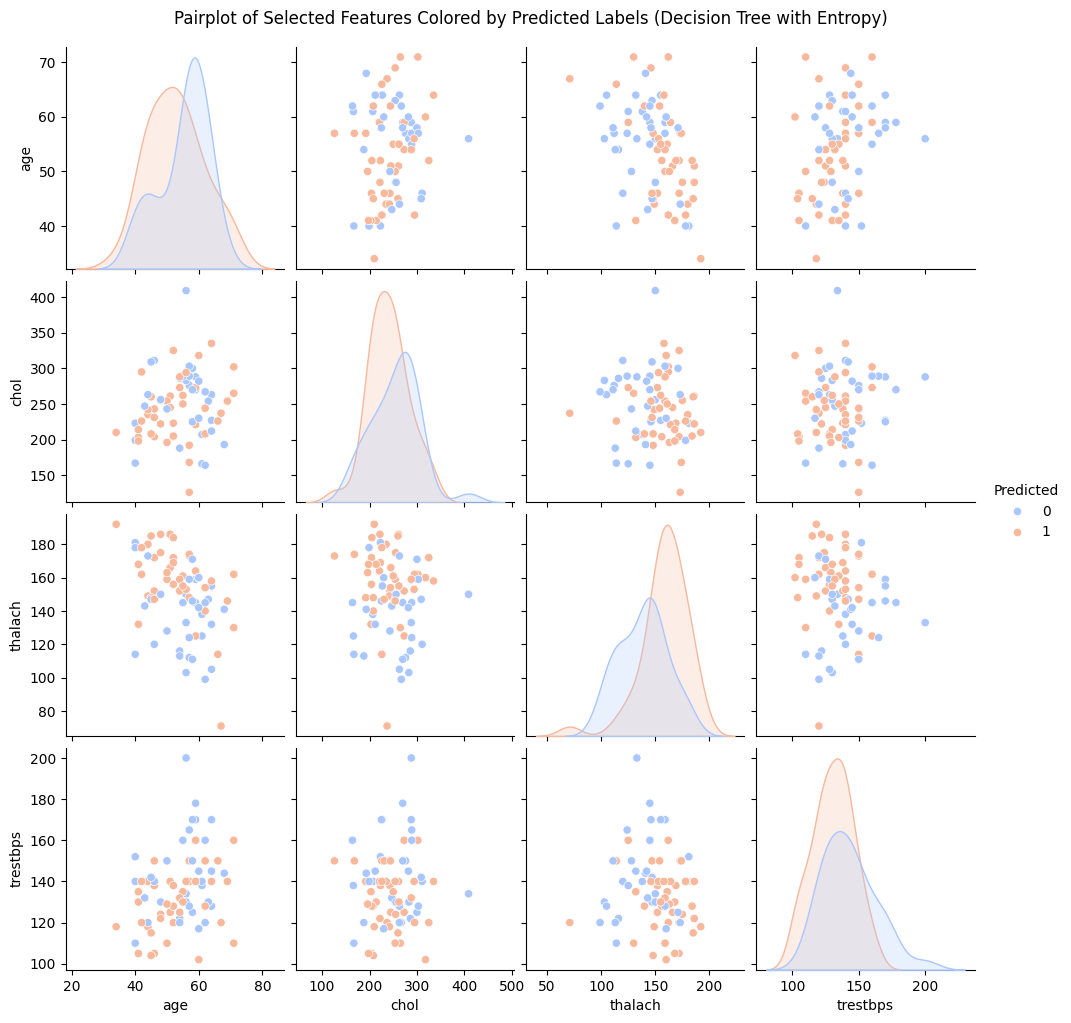

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=2,criterion='entropy',random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Decision Tree:")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Create a pairplot with predicted labels
print("Pairplot:\n")
pairplot_df = X_test.copy()
pairplot_df['Predicted'] = y_pred

# Select a few features for pairplot to avoid clutter
features_to_plot = ['age', 'chol', 'thalach', 'trestbps', 'Predicted']
sns.pairplot(pairplot_df[features_to_plot], hue='Predicted', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features Colored by Predicted Labels (Decision Tree with Entropy)', y=1.02)
plt.show()

**3. Random Forest Classifier**

Random Forest:
Accuracy: 0.84
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



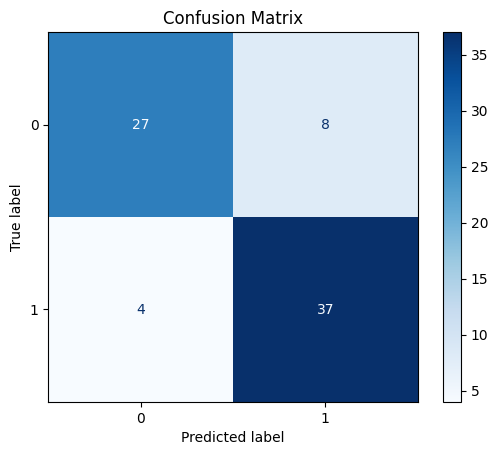

Boxplot:



<ipython-input-13-9d2d40e77fea>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Predicted', y='chol', data=plot_df, palette='coolwarm')


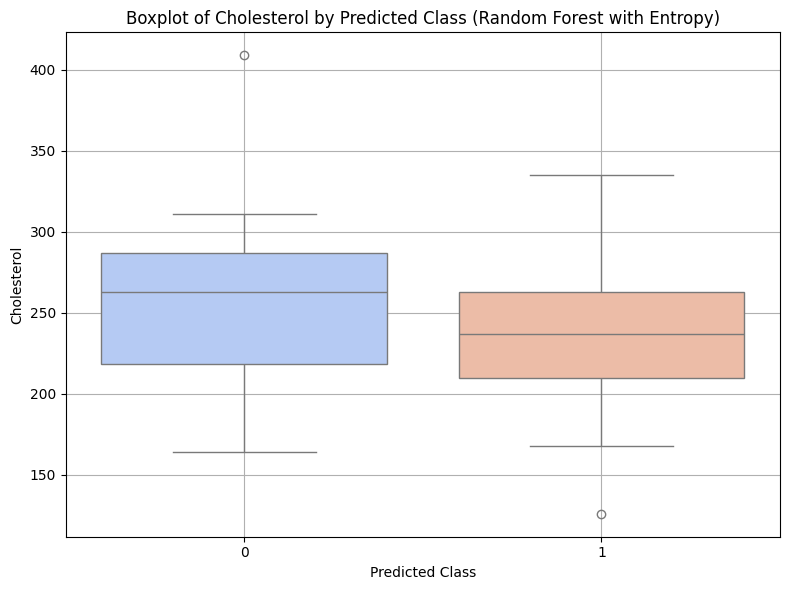

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Train Random Forest model with entropy criterion
model = RandomForestClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Random Forest:")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Create a boxplot of cholesterol across predicted classes
print("Boxplot:\n")
plot_df = X_test.copy()
plot_df['Predicted'] = y_pred

plt.figure(figsize=(8, 6))
sns.boxplot(x='Predicted', y='chol', data=plot_df, palette='coolwarm')
plt.xlabel('Predicted Class')
plt.ylabel('Cholesterol')
plt.title('Boxplot of Cholesterol by Predicted Class (Random Forest with Entropy)')
plt.grid(True)
plt.tight_layout()
plt.show()

**4. Support Vector Machines(SVM)**

SVM:
Accuracy: 0.87
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



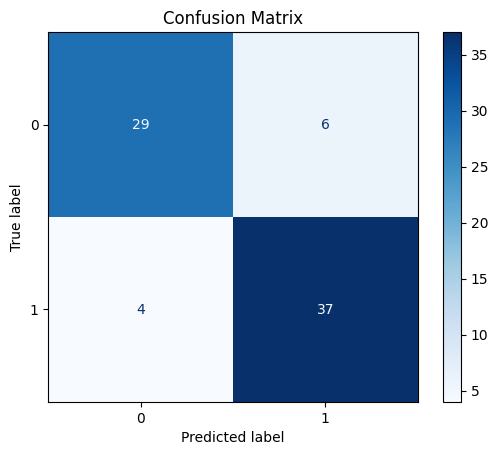

Scatter Plot:



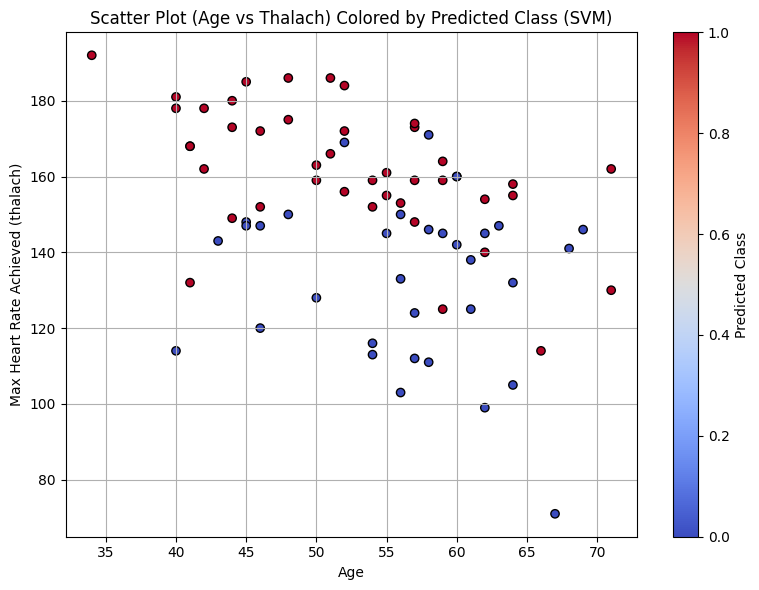

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("SVM:")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Create a scatter plot of two features colored by predicted labels
print("Scatter Plot:\n")
plot_df = X_test.copy()
plot_df['Predicted'] = y_pred

plt.figure(figsize=(8, 6))
scatter = plt.scatter(plot_df['age'], plot_df['thalach'], c=plot_df['Predicted'], cmap='coolwarm', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved (thalach)')
plt.title('Scatter Plot (Age vs Thalach) Colored by Predicted Class (SVM)')
plt.colorbar(scatter, label='Predicted Class')
plt.grid(True)
plt.tight_layout()
plt.show()

### **5. Naive Bayes**

Naive Bayes:
Accuracy: 0.88
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



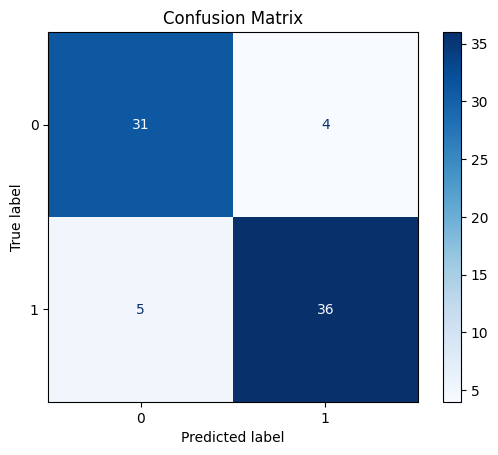

Heatmap:



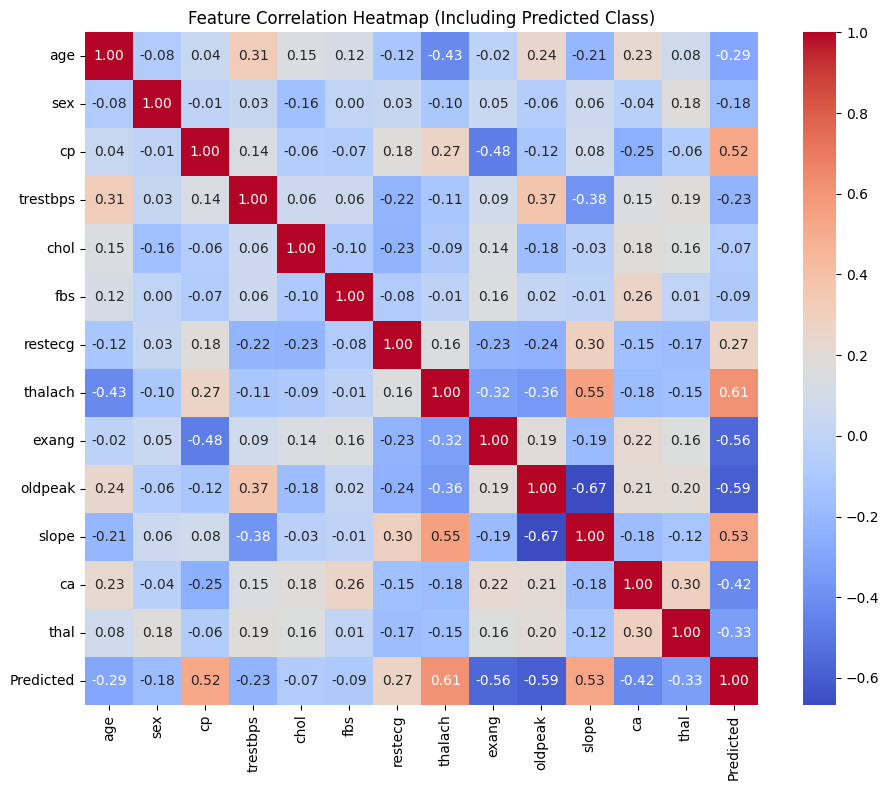

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Naive Bayes:")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Heatmap of feature correlations by predicted class
print("Heatmap:\n")
plot_df = X_test.copy()
plot_df['Predicted'] = y_pred

# Compute correlation matrix
corr = plot_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Feature Correlation Heatmap (Including Predicted Class)")
plt.tight_layout()
plt.show()


# **Final Model Implementation**

**CASE 1 – For Heart Disease data**

In [18]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Define input values (sample patient data)
input_values = (63, 1, 145, 233, 150, 2.3, 0, 0, 1, 0, 2.3, 0, 1)

# Create a DataFrame using the same columns as training data
input_columns = X.columns  # X is the training feature set
input_df = pd.DataFrame([input_values], columns=input_columns)

# Predict using the trained Logistic Regression model
pre1 = model.predict(input_df)

# Interpret the prediction
if pre1[0] == 1:
    print("The patient seems to have heart disease :(")
else:
    print("The patient seems to be Normal :)")

The patient seems to have heart disease :(


**CASE 2 – For Normal Data**

In [20]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Define the input patient data
input_values = (60, 0, 0, 150, 258, 0, 0, 157, 0, 2.6, 1, 2, 2)

# Create a DataFrame using the same columns as training data
input_columns = X.columns  # X is the training feature set
input_df = pd.DataFrame([input_values], columns=input_columns)

# Predict using the trained Naive Bayes model
pre1 = model.predict(input_df)

# Print prediction result
if pre1[0] == 1:
    print("The patient seems to have heart disease :(")
else:
    print("The patient seems to be Normal :)")


The patient seems to be Normal :)


In [ ]:
Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?Snapchat uses a variety of machine learning (ML) algorithms to power its features. Here are the main areas and the likely ML algorithms used:

---

### 1. **Augmented Reality (AR) Filters and Lenses**
**Purpose**: Real-time facial recognition, tracking, and overlay of 3D effects.

**ML Algorithms**:
- **Convolutional Neural Networks (CNNs)** – for facial detection and landmark localization.
- **Object detection models** (e.g., YOLO, SSD) – for detecting faces and keypoints in real-time.
- **3D Morphable Models** – for mapping effects onto faces accurately.
- **Active Shape Models (ASM)** and **Active Appearance Models (AAM)** – for face tracking and deformation.

---

### 2. **Snapchat Camera Features**
**Purpose**: Real-time object and scene recognition.

**ML Algorithms**:
- **CNNs + Transfer Learning** – used with pre-trained models like ResNet or MobileNet for object recognition.
- **Semantic Segmentation Models** (e.g., U-Net, DeepLab) – to separate background/foreground.

---

### 3. **Bitmoji and Stickers Recommendation**
**Purpose**: Personalized avatar generation and contextual sticker suggestions.

**ML Algorithms**:
- **Recommendation systems** – collaborative filtering and content-based filtering.
- **Clustering algorithms** – to group similar sticker or avatar styles.
- **Autoencoders** – for image-based feature extraction.

---

### 4. **Discover Feed Personalization**
**Purpose**: Recommend content tailored to user preferences.

**ML Algorithms**:
- **Deep Neural Networks (DNNs)** – for learning user interests over time.
- **Ranking algorithms** – like Learning to Rank (LTR).
- **Reinforcement Learning** – to optimize user engagement.

---

### 5. **Snapchat’s Voice and Text Recognition**
**Purpose**: Recognize voice commands and understand text inputs.

**ML Algorithms**:
- **Automatic Speech Recognition (ASR)** using **RNNs**, **LSTMs**, or **Transformers**.
- **Natural Language Processing (NLP)** models like **BERT** or **GPT** – for understanding and generating responses.

---

### 6. **Content Moderation**
**Purpose**: Detect offensive content (text, image, or video).

**ML Algorithms**:
- **CNNs + RNNs** – for detecting inappropriate content in images and videos.
- **Transformer-based NLP models** – for text moderation.
- **Multimodal models** – that analyze both text and visuals.

---

### 7. **Snap Map and Location-Based Suggestions**
**Purpose**: Personalized recommendations based on geolocation.

**ML Algorithms**:
- **Spatiotemporal modeling** – using sequence models like LSTMs.
- **Clustering** – like DBSCAN for location grouping.

---

If you're looking into one of these features specifically (e.g., AR filters, content recommendation), I can go deeper into the specific models used or how you might build something similar. Want to dive into one?